### 1. Crear un entorno de anaconda con los paquetes

In [216]:
import numpy as np
import pandas as pd
import seaborn as sns, numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

### Importar datos

In [4]:
data=np.load("proyecto_training_data.npy")
data=pd.DataFrame(data)
data.columns =['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd','YearBuilt','LotFrontage']
data.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


### 2. Separar data de entrenamiento de la data test

In [5]:
p_train = 0.8 # Porcentaje de train.

data['train'] = np.random.uniform(0, 1, len(data)) <= p_train
train, test = data[data['train']==True], data[data['train']==False]
data = data.drop('train', 1)
data_training = train.drop('train', 1)
data_test = test.drop('train', 1)

In [6]:
data_training.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
5,143000.0,5.0,796.0,5.0,1993.0,85.0


In [7]:
data_test.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
3,140000.0,7.0,961.0,7.0,1915.0,60.0
6,307000.0,8.0,1694.0,7.0,2004.0,75.0
10,129500.0,5.0,1040.0,5.0,1965.0,70.0
12,144000.0,5.0,912.0,4.0,1962.0,NaN
13,279500.0,7.0,1494.0,7.0,2006.0,91.0


### 3. Análisis exploratorio de datos: Para cada variable en el dataset calcular

In [8]:
summary=pd.DataFrame([(round(data["SalePrice"].mean(),2),
                        round(data["SalePrice"].max(),2),
                        round(data["SalePrice"].min(),2),
                        round(data["SalePrice"].max()-data["SalePrice"].min(),2),
                        round(data["SalePrice"].std(),2)),
                       (round(data["OverallQual"].mean(),2),
                        round(data["OverallQual"].max(),2),
                        round(data["OverallQual"].min(),2),
                        round(data["OverallQual"].max()-data["OverallQual"].min(),2),
                        round(data["OverallQual"].std(),2)),
                       (round(data["1stFlrSF"].mean(),2),
                        round(data["1stFlrSF"].max(),2),
                        round(data["1stFlrSF"].min(),2),
                        round(data["1stFlrSF"].max()-data["1stFlrSF"].min(),2),
                        round(data["1stFlrSF"].std(),2)), 
                       (round(data["TotRmsAbvGrd"].mean(),2),
                        round(data["TotRmsAbvGrd"].max(),2),
                        round(data["TotRmsAbvGrd"].min(),2),
                        round(data["TotRmsAbvGrd"].max()-data["TotRmsAbvGrd"].min(),2),
                        round(data["TotRmsAbvGrd"].std(),2)),
                       (round(data["YearBuilt"].mean(),2),
                        round(data["YearBuilt"].max(),2),
                        round(data["YearBuilt"].min(),2),
                        round(data["YearBuilt"].max()-data["YearBuilt"].min(),2),
                        round(data["YearBuilt"].std(),2)), 
                       (round(data["LotFrontage"].mean(),2),
                        round(data["LotFrontage"].max(),2),
                        round(data["LotFrontage"].min(),2),
                        round(data["LotFrontage"].max()-data["LotFrontage"].min(),2),
                        round(data["LotFrontage"].std(),2))],
                    columns =('Media', 'valor máximo', 'valor mínimo','rango','desviación estándar'),
                    index = ('SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd','YearBuilt','LotFrontage'))
summary

,Media,valor máximo,valor mínimo,rango,desviación estándar
SalePrice,180921.20,755000.0,34900.0,720100.0,79442.50
OverallQual,6.10,10.0,1.0,9.0,1.38
1stFlrSF,1162.63,4692.0,334.0,4358.0,386.59
TotRmsAbvGrd,6.52,14.0,2.0,12.0,1.63
YearBuilt,1971.27,2010.0,1872.0,138.0,30.20
LotFrontage,70.05,313.0,21.0,292.0,24.28


### 4. Histogramas de las variables del dataset

Text(0.5, 1.0, "The property's sale price in dollars")

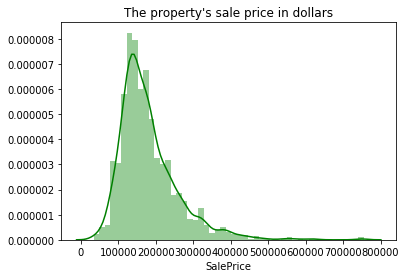

In [9]:
sns.distplot(data["SalePrice"], color='green')
plt.title("The property's sale price in dollars")

Text(0.5, 1.0, 'Overall material and finish quality')

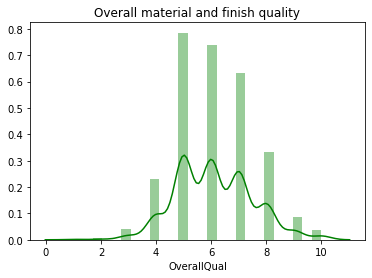

In [10]:
sns.distplot(data["OverallQual"], color='green')
plt.title("Overall material and finish quality")

Text(0.5, 1.0, 'First Floor square feet')

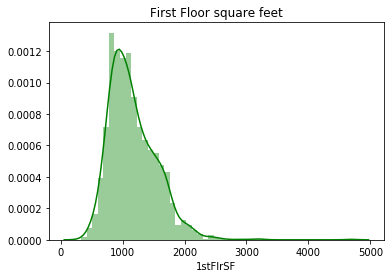

In [11]:
sns.distplot(data["1stFlrSF"], color='green')
plt.title("First Floor square feet")

Text(0.5, 1.0, 'Total rooms above grade')

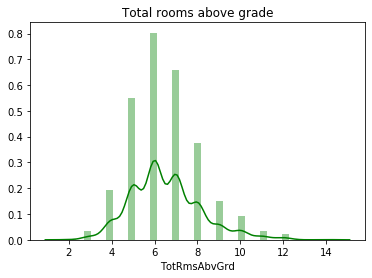

In [12]:
sns.distplot(data["TotRmsAbvGrd"], color='green')
plt.title("Total rooms above grade")

Text(0.5, 1.0, 'Original construction date')

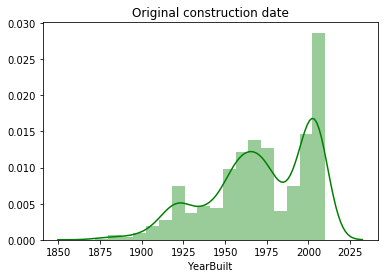

In [13]:
sns.distplot(data["YearBuilt"], color='green')
plt.title("Original construction date")

Text(0.5, 1.0, 'Linear feet of street connected to property')

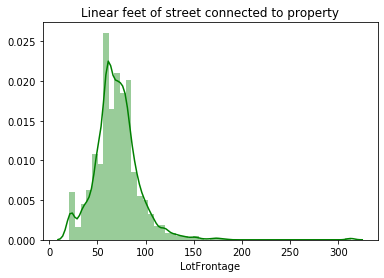

In [14]:
sns.distplot(data["LotFrontage"], color='green')
plt.title("Linear feet of street connected to property")

Text(0.5, 1.0, 'Diagrama de disperción y coeficiente de correlación lineal de Pearson :0.791 entre SalePrice y OverallQual')

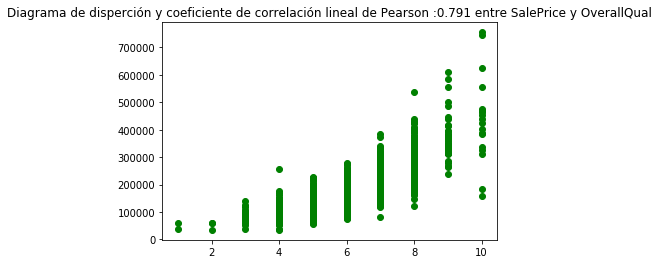

In [15]:
r = data.corr(method="pearson")["SalePrice"]["OverallQual"]
plt.scatter(data["OverallQual"],data["SalePrice"], color='green')
plt.title(f"Diagrama de disperción y coeficiente de correlación lineal de Pearson :{round(r,3)} entre SalePrice y OverallQual")

### 5. Para cada variable independiente x :

Calcular el coeficiente de correlaci´on entre x y y.
Graficar x vs y(scatterplot) usando matplotlib.
Colocar el coeficiente de correlaci´on y colocarlo como parte del t´ıtulo de la gr´afica.
Basado en la gr´afica y el coeficiente de correlaci´on de cada par x,y elegir las 2 variables
con m´as potencial predictivo es decir las 2 variables que presentan mayor correlaci´on
entre dicha variable y la variable dependiente.

Text(0.5, 1.0, 'Diagrama de disperción y coeficiente de correlación lineal de Pearson :0.606 entre SalePrice y 1stFlrSF')

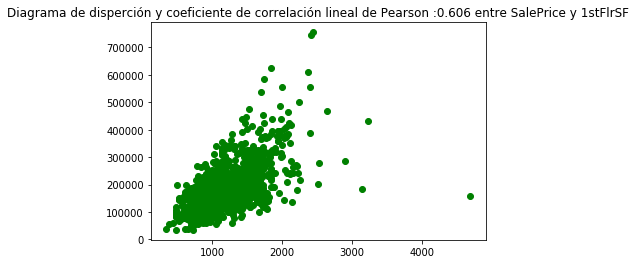

In [16]:
r = data.corr(method="pearson")["SalePrice"]["1stFlrSF"]
plt.scatter(data["1stFlrSF"],data["SalePrice"], color='green')
plt.title(f"Diagrama de disperción y coeficiente de correlación lineal de Pearson :{round(r,3)} entre SalePrice y 1stFlrSF")

Text(0.5, 1.0, 'Diagrama de disperción y coeficiente de correlación lineal de Pearson :0.534 entre SalePrice y TotRmsAbvGrd')

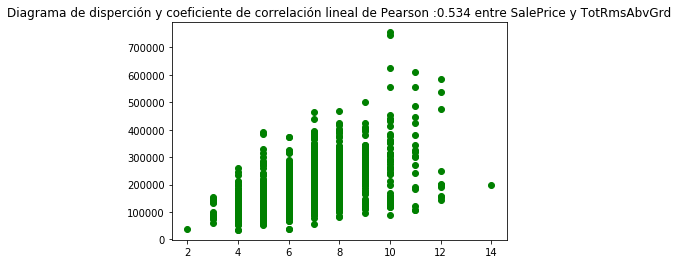

In [17]:
r = data.corr(method="pearson")["SalePrice"]["TotRmsAbvGrd"]
plt.scatter(data["TotRmsAbvGrd"],data["SalePrice"], color='green')
plt.title(f"Diagrama de disperción y coeficiente de correlación lineal de Pearson :{round(r,3)} entre SalePrice y TotRmsAbvGrd")

Text(0.5, 1.0, 'Diagrama de disperción y coeficiente de correlación lineal de Pearson :0.523 entre SalePrice y YearBuilt')

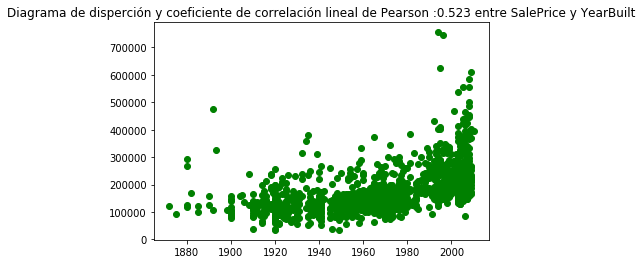

In [18]:
r = data.corr(method="pearson")["SalePrice"]["YearBuilt"]
plt.scatter(data["YearBuilt"],data["SalePrice"], color='green')
plt.title(f"Diagrama de disperción y coeficiente de correlación lineal de Pearson :{round(r,3)} entre SalePrice y YearBuilt")

Text(0.5, 1.0, 'Diagrama de disperción y coeficiente de correlación lineal de Pearson :0.352 entre SalePrice y LotFrontage')

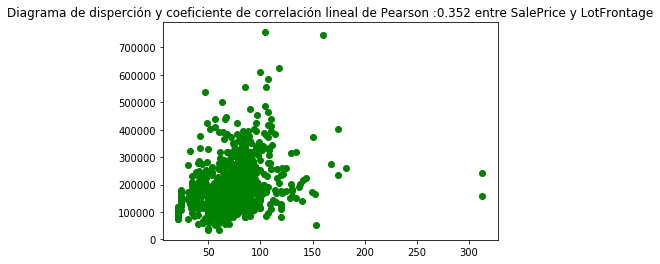

In [19]:
r = data.corr(method="pearson")["SalePrice"]["LotFrontage"]
plt.scatter(data["LotFrontage"],data["SalePrice"], color='green')
plt.title(f"Diagrama de disperción y coeficiente de correlación lineal de Pearson :{round(r,3)} entre SalePrice y LotFrontage")

##### Seleccion de variables independientes

Considerando los valores de correlación lineal de Pearson las variables OverallQual y 1stFlrSF fueron los que presentaron un mayor valor al ser correlacionadas con la variable independiente, por lo cual se estará empleando estas dos variables para el resto de la tarea

### 6. Crear una función para entrenar un modelo de regresión lineal de una variable y = β0 +β1 ∗x.

6.1 Vector con la variable independiente x,

6.2 Vector con la variable dependiente y,

6.3 un entero epochs que indica por cuantas iteraciones entrenar el modelo.

6.4 un entero imprimir error cada , que nos indica cada cuantas iteraciones queremos
imprimir a través de print: el n´umero de iteración, el error del modelo en esa iteración, si imprimir error cada = 10, se despliega en pantalla el error en las iteraciones:10,20,30,40,50.

6.5 escalar α(learning rate): es usado como parte de la expresión matemática para actualizar
en cada iteración los parámetros del modelo

### 7. Creación de la funcion 

In [253]:
def entrenar_RL(vector_x, vector_y, epochs, imprimir_error_cada, learning_rate):

    #7.1 Crear una matriz de 2 columnas
    x = np.vstack(vector_x) 
    y = np.array(vector_y) 
    x_matrix = np.concatenate((x, np.ones_like(x)), axis = 1) 
    transpose_matrix_x = x_matrix.T 

    #7.2 Inicializar los parámetros del modelo
    pendiente= 0
    intercepto = 0
    parametros = np.array([pendiente,intercepto])  

    lista_errores = []   #Definir listado de errores  (#7.3.3)
    resultados = {} #Definir resultados o parametros resultantes (#7.3.6)

    #7.3 Iteraciónes
    for contador in range(epochs):

        #7.3.1 Calcular predicción
        y_predicho = np.dot(x_matrix, parametros)  

        #7.3.2 Calcular el error o costo
        error = 0.5*(np.mean((y - y_predicho)**2)) 

        #7.3.3 Almacenar en un vector el error de cada iteración
        lista_errores.append(error)   

        #7.3.4 Calcular el gradiente del error respecto de cada parámetro (pendiente e intercepto)
        gradientes_errores = np.mean(((y_predicho-y)*transpose_matrix_x), axis = 1)

        #7.3.5 Actualizar los parámetros del modelo con la expresión
        parametros = parametros - (learning_rate*gradientes_errores)

        #7.3.6 Almacenamos los resultados del modelo en un diccionario
        resultados[contador] = [parametros[0],parametros[1]]

        #7.3.7 La función devuelve 2 resultados: La estructura de datos conteniendo el modelo de cada iteración y el error de cada iteración.
        if contador % imprimir_error_cada == 0: print(f"Iteración: {contador}, con un error de: {round(error,2)} ")
            
        def ultimo_modelo(x):
            return parametros[0] * x + parametros[1]

    return resultados, lista_errores, ultimo_modelo


In [254]:
n_iteraciones, error_iteracion, manual_OverallQual = entrenar_RL(data_training["OverallQual"], data_training["SalePrice"], 10000, 1000, 0.00001)

Iteración: 0, con un error de: 19238674074.57 
Iteración: 1000, con un error de: 9476707924.86 
Iteración: 2000, con un error de: 5071604580.71 
Iteración: 3000, con un error de: 3083723364.24 
Iteración: 4000, con un error de: 2186585628.43 
Iteración: 5000, con un error de: 1781633320.12 
Iteración: 6000, con un error de: 1598774083.2 
Iteración: 7000, con un error de: 1516131884.94 
Iteración: 8000, con un error de: 1478711583.76 
Iteración: 9000, con un error de: 1461697261.88 


In [241]:
#7.3.8 Crear una funci´on que nos permita visualizar con matplotlib c´omo cambia el error 
def grafica_error_tiempo(iteraciones, lista_errores):  
    y = np.array(lista_errores) 
    x = [i for i in range(len(n_iteraciones))]
    grafica = plt.figure()
    error_t = grafica.add_subplot(1,1,1) 
    error_t.plot(x,y)   
    error_t.set_xlabel('Iteración')
    error_t.set_ylabel('Error')
    error_t.set_title('Cambio del error en cada iteración') 
    plt.show()


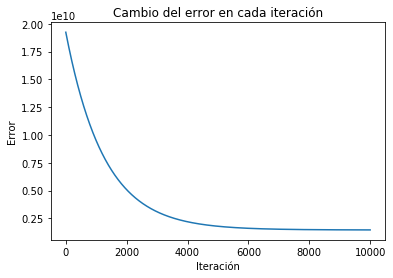

In [242]:
grafica_error_tiempo(n_iteraciones, error_iteracion)

In [243]:
#7.3.9 Crear una funci´on que nos permita visualizar con matplotlib c´omo evoluciona el modelo entrenado en el tiempo
def progreso_entreno(parametros,vector_x, vector_y,n):
    modelo_i = np.empty_like(vector_x)
    for i in range(len(parametros)): 
        if (i+1) % n == 0 or i == 0: 
            for j in range(len(vector_x)): 
                modelo_i[j] = parametros[i][0]*vector_x[j] + parametros[i][1]             
            print(f"Iteración: {i+1} y = {round(parametros[i][0],2)}*x + {round(parametros[i][1],2)}")         
            plt.plot(vector_x,modelo_i,label='Iteración: {i}'.format(i=i+1))
            plt.legend(loc = 'best')
    print("")
    plt.scatter(vector_x,vector_y,s=10, c="g")
    plt.xlabel('Variable independiente')
    plt.ylabel('Variable dependiente')
    plt.show()
    return

Iteración: 1 y = 11.76*x + 1.79
Iteración: 1000 y = 9706.0*x + 1471.25
Iteración: 2000 y = 16228.41*x + 2443.8
Iteración: 3000 y = 20612.26*x + 3081.35
Iteración: 4000 y = 23559.54*x + 3493.87
Iteración: 5000 y = 25541.82*x + 3755.25
Iteración: 6000 y = 26875.87*x + 3915.1
Iteración: 7000 y = 27774.47*x + 4006.76
Iteración: 8000 y = 28380.56*x + 4052.62
Iteración: 9000 y = 28790.15*x + 4067.72
Iteración: 10000 y = 29067.76*x + 4062.16



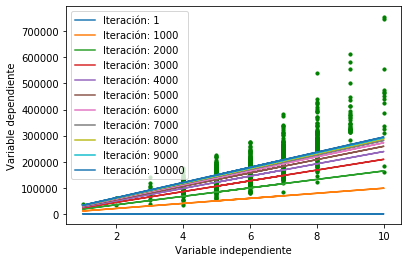

In [244]:
progreso_entreno(n_iteraciones, np.asarray(data_training[["OverallQual"]]), np.asarray(data_training[["SalePrice"]]),1000)

Iteración: 0, con un error de: 19238674074.57 
Iteración: 3, con un error de: 2324546025.79 
Iteración: 6, con un error de: 2122455832.89 
Iteración: 9, con un error de: 2120041212.39 
Iteración: 12, con un error de: 2120012317.35 


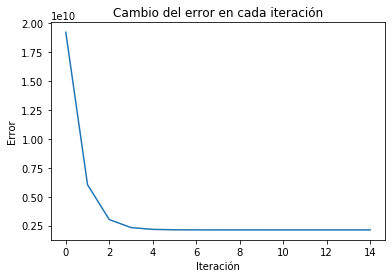

In [245]:
n_iteraciones, error_iteracion, manual_1stFlrSF = entrenar_RL(data_training["1stFlrSF"], data_training["SalePrice"], 15, 3, 0.000001)
grafica_error_tiempo(n_iteraciones, error_iteracion)

Iteración: 1 y = 224.96*x + 0.18
Iteración: 2 y = 117.4*x + 0.1
Iteración: 4 y = 144.24*x + 0.13
Iteración: 6 y = 150.37*x + 0.14
Iteración: 8 y = 151.78*x + 0.15
Iteración: 10 y = 152.1*x + 0.16
Iteración: 12 y = 152.17*x + 0.17
Iteración: 14 y = 152.19*x + 0.17



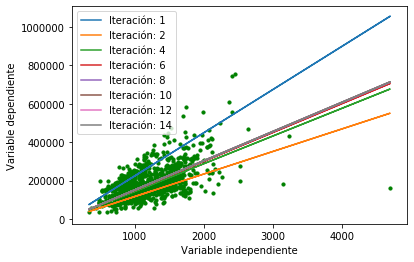

In [246]:
progreso_entreno(n_iteraciones, np.asarray(data_training[["1stFlrSF"]]), np.asarray(data_training[["SalePrice"]]),2)

In [247]:
#7.3.11 Para cada una de las variables x seleccionadas, usar scikit-learn para entrenar un modelo de regresión lineal: 
def Scikit_Learn_model(x,y):
    x=pd.DataFrame(x)
    y=pd.DataFrame(y)
    modelo = linear_model.LinearRegression().fit(x, y) 
    print("Los coeficientes del modelo son: B1 = ",np.around(modelo.coef_,2),", B0 = ", np.around(modelo.intercept_,2))
    def funcion(x):
        return modelo.coef_ * x + modelo.intercept_
    return funcion

In [248]:
sk_OverallQual=Scikit_Learn_model(data_training["OverallQual"], data_training["SalePrice"])

Los coeficientes del modelo son: B1 =  [[45145.95]] , B0 =  [-94956.3]


<function __main__.Scikit_Learn_model.<locals>.funcion(x)>

In [249]:
sk_1stFlrSF=Scikit_Learn_model(data_training["1stFlrSF"], data_training["SalePrice"])

Los coeficientes del modelo son: B1 =  [[122.16]] , B0 =  [38514.84]


<function __main__.Scikit_Learn_model.<locals>.funcion(x)>

In [258]:
manual_OverallQual(data_training["OverallQual"])



0       207536.459788
1       178468.702924
2       207536.459788
4       236604.216653
5       149400.946060
            ...      
1455    178468.702924
1456    178468.702924
1457    207536.459788
1458    149400.946060
1459    149400.946060
Name: OverallQual, Length: 1171, dtype: float64

In [260]:
data_training["SalePrice"]

0       208500.0
1       181500.0
2       223500.0
4       250000.0
5       143000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1171, dtype: float64